In [1]:
import tensorflow as tf
from PIL import Image

2022-12-19 18:53:05.360045: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-19 18:53:11.926194: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-12-19 18:53:11.946183: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-12-19 18:53:12.668369: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-12-19 18:53:32.598747: W tensorflow/stream_executor/platform/de

In [4]:
model=tf.keras.models.load_model("rice_pred.h5")
classes=[
    "Arborio",
    "Basmati",
    "Ipsala",
    "Jasmine",
    "Karacadag"
    
]

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 9)         252       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 9)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 18)        1476      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 18)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 6, 6, 36)          5868      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 3, 3, 36)         0

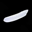

In [7]:
img=Image.open("/home/student/Desktop/suretrust/cnn/rice/Rice_Image_Dataset/Basmati/basmati1.jpg")
img=img.resize((32,32))
img

In [8]:
test=tf.reshape(tf.constant(img)/255,(-1,32,32,3))
preds=model.predict(test,verbose=False)[0]*100
preds=tf.math.round(preds)
print(preds)

tf.Tensor([ 0. 89.  0. 11.  0.], shape=(5,), dtype=float32)


In [9]:
accuracy=tf.reduce_max(preds)
index=int(tf.where(preds==accuracy)[0][0])
print(index)
pred=classes[index]
pred

1


'Basmati'

In [10]:
print(pred.title(),int(accuracy),"%")

Basmati 89 %
